# ECG Heartbeat Categorization Dataset

### Anlysis step

In [1]:
# Importando librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Loading the data
df_train = pd.read_csv("../data/raw/mitbih_train.csv")
df_test = pd.read_csv("../data/raw/mitbih_test.csv")

In [3]:
df_test.head()

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.shape

(87553, 188)

In [5]:
df_test.shape

(21891, 188)

In [6]:
df_train.isnull().sum()
if df_train.isnull().sum().sum() == 0:
    print("No hay valores faltantes en el conjunto de entrenamiento")
else:
    print("Hay valores faltantes en el conjunto de entrenamiento")

df_test.isnull().sum()
if df_test.isnull().sum().sum() == 0:
    print("No hay valores faltantes en el conjunto de prueba")
else:
    print("Hay valores faltantes en el conjunto de prueba")

No hay valores faltantes en el conjunto de entrenamiento
No hay valores faltantes en el conjunto de prueba


Hay 87553 registros en el conjunto de datos de entrenamiento
Hay 21891 registros en el conjunto de datos de prueba


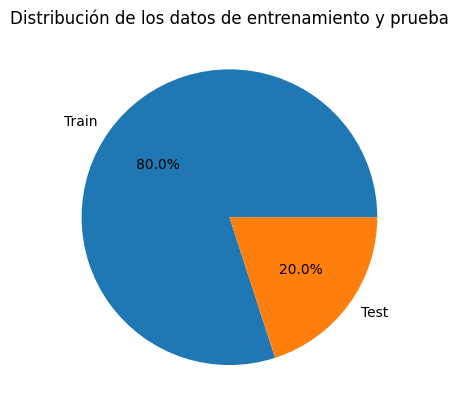

In [7]:
# Graficando la distribución de los datos de entrenamiento y prueba
import matplotlib.pyplot as plt

# Contando el número de registros en el conjunto de datos de entrenamiento
count_train = df_train.shape[0]
print("Hay", count_train, "registros en el conjunto de datos de entrenamiento")

# Contando el número de registros en el conjunto de datos de prueba
count_test = df_test.shape[0]
print("Hay", count_test, "registros en el conjunto de datos de prueba")

y = np.array([count_train, count_test])

plt.pie(y, labels = ['Train', 'Test'], autopct='%1.1f%%')
plt.title('Distribución de los datos de entrenamiento y prueba')
plt.show()

clases en el dataset

In [8]:
print(df_train.iloc[:, -1])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87548    4.0
87549    4.0
87550    4.0
87551    4.0
87552    4.0
Name: 0.000000000000000000e+00.88, Length: 87553, dtype: float64


In [9]:
print('train set classes: ', df_train.iloc[:, -1].unique())
print('test set classes: ', df_test.iloc[:, -1].unique())

train set classes:  [0. 1. 2. 3. 4.]
test set classes:  [0. 1. 2. 3. 4.]


Clasificaciones

0: "Normal",

1: "Artial Premature",

2: "Premature ventricular contraction",

3: "Fusion of ventricular and normal",

4: "Fusion of paced and normal"

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
heartbeat_categories = ['N', 'S', 'V', 'F', 'Q']

C:\Users\palmi\AppData\Local\Temp\ipykernel_48756\1057309979.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=HB_categories.index, y=HB_categories, palette='viridis')


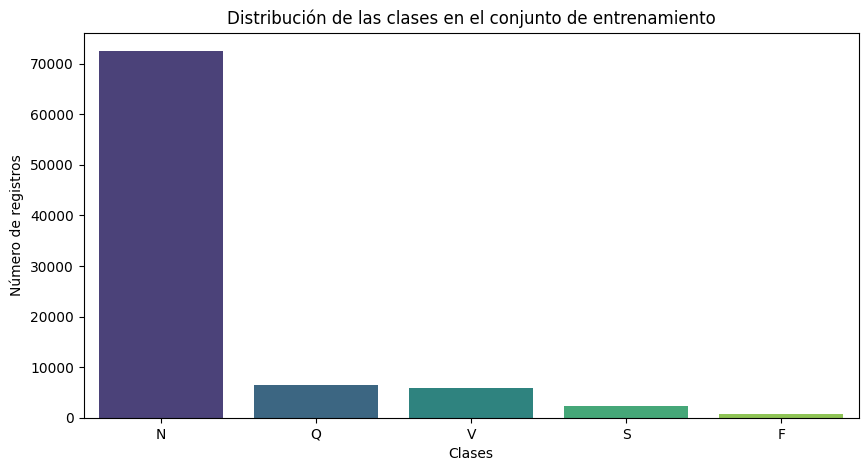

In [12]:
# Generando un diccionario de datos de entrenamiento
HB_categories = df_train.iloc[:, -1].value_counts()
HB_count = df_train.iloc[:, -1].unique()

# Renombrando las categorías de los latidos del corazón. 0 = N, 1 = S, 2 = V, 3 = F, 4 = Q
HB_categories = HB_categories.rename({0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'})

plt.figure(figsize=(10, 5))
sns.barplot(x=HB_categories.index, y=HB_categories, palette='viridis')
plt.title('Distribución de las clases en el conjunto de entrenamiento')
plt.xlabel('Clases')
plt.ylabel('Número de registros')
plt.show()


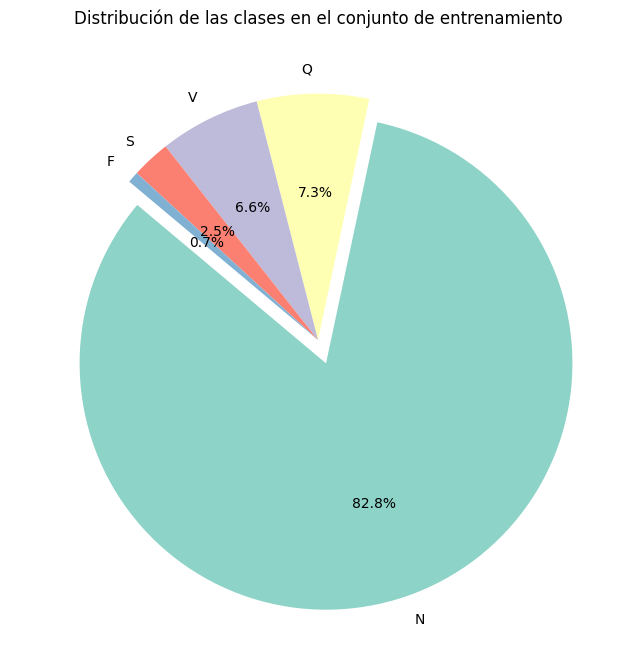

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(HB_categories, labels=HB_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'), explode=(0.1, 0, 0, 0, 0))
plt.title('Distribución de las clases en el conjunto de entrenamiento')
plt.show()


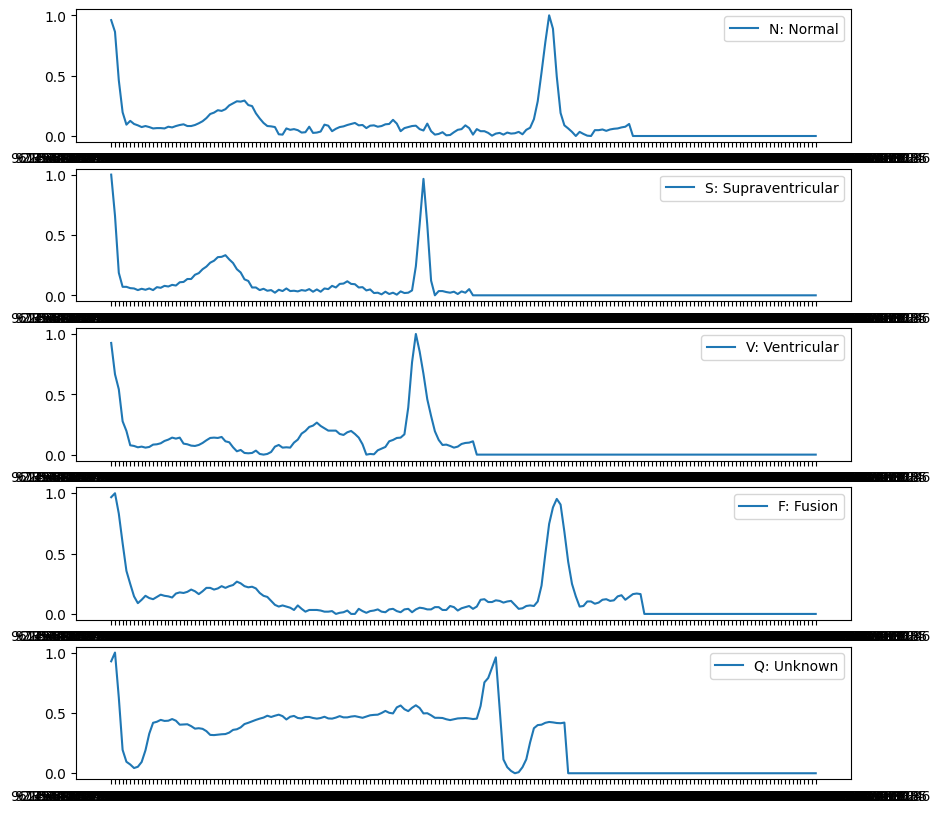

In [14]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
category_descriptions = {"N": "Normal", "S": "Supraventricular", "V": "Ventricular", "F": "Fusion", "Q": "Unknown"}

for i in range(5):
    axs[i].plot(df_train.iloc[i, :186], label=f"{heartbeat_categories[i]}: {category_descriptions[heartbeat_categories[i]]}")
    axs[i].legend(loc='upper right')

plt.show()

In [3]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from pprint import pprint
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [16]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    
    pipeline = ImbPipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    f1_scorer = make_scorer(f1_score, average='macro')
    # Validación cruzada en el conjunto de entrenamiento
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=f1_scorer)
    print(f'F1 Score: {scores.mean():.4f}')
    


    # Ajuste del modelo
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    

In [4]:
df_train.columns = [f'Feature {i + 1}' for i in range(len(df_train.columns) - 1)] + ['Target']

In [6]:
# SEPARAMOS LOS DATOS PREDICTORES Y OBJETIVO
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Submuestreo
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42) 


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


-------- Evaluando KNN --------


Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\palmi\.conda\envs\concentracion\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\palmi\.conda\envs\concentracion\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\palmi\.conda\envs\concentracion\lib\subprocess.py", line 1515, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\palmi\.conda\envs\concentracion\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\palmi\.conda\envs\concentracion\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physi

F1 Score: 0.8116
              precision    recall  f1-score   support

         0.0       0.69      0.46      0.55       133
         1.0       0.87      0.87      0.87       422
         2.0       0.93      0.96      0.94      1182
         3.0       0.82      0.84      0.83       135
         4.0       0.98      0.97      0.98      1273

    accuracy                           0.93      3145
   macro avg       0.86      0.82      0.84      3145
weighted avg       0.93      0.93      0.93      3145



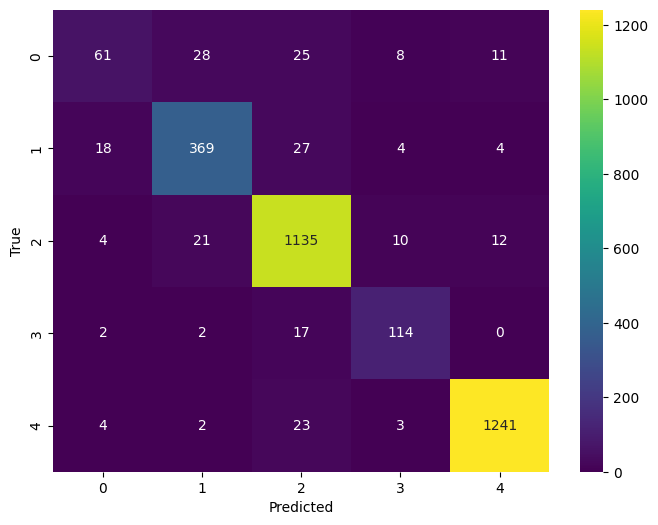

In [19]:
print('-------- Evaluando KNN --------')
evaluate_model(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

In [20]:
print('-------- Evaluando RF --------')
evaluate_model(RandomForestClassifier(), X_train, y_train, X_test, y_test)

-------- Evaluando RF --------


KeyboardInterrupt: 

-------- Evaluando SVM --------
F1 Score: 0.8150
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       158
         1.0       0.83      0.81      0.82       118
         2.0       0.80      0.80      0.80       124
         3.0       0.87      0.87      0.87       121
         4.0       0.97      0.91      0.94       120

    accuracy                           0.83       641
   macro avg       0.84      0.83      0.84       641
weighted avg       0.83      0.83      0.83       641



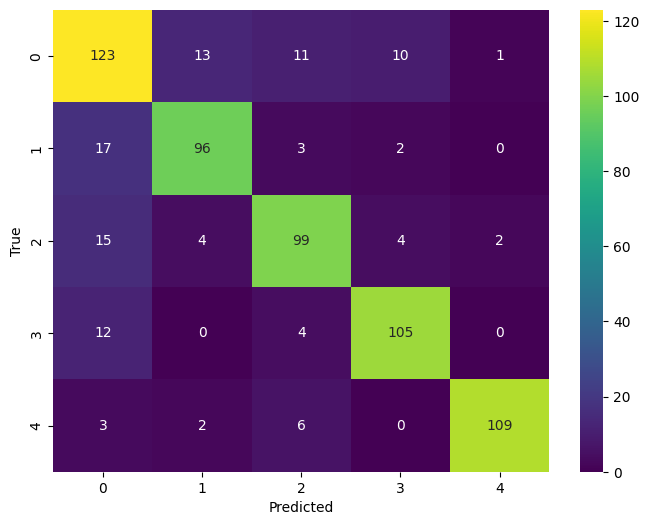

In [ ]:
print('-------- Evaluando SVM --------')
evaluate_model(SVC(), X_train, y_train, X_test, y_test)

-------- Evaluando GB --------
F1 Score: 0.8492
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74       158
         1.0       0.82      0.85      0.83       118
         2.0       0.81      0.83      0.82       124
         3.0       0.89      0.86      0.87       121
         4.0       0.92      0.93      0.93       120

    accuracy                           0.83       641
   macro avg       0.84      0.84      0.84       641
weighted avg       0.83      0.83      0.83       641



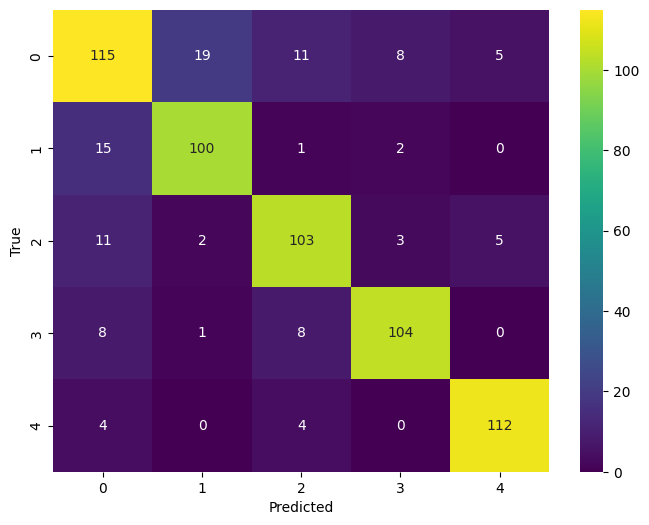

In [ ]:
print('-------- Evaluando GB --------')
evaluate_model(GradientBoostingClassifier(), X_train, y_train, X_test, y_test)

-------- Evaluando MLP --------
F1 Score: 0.8575
              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72       133
         1.0       0.88      0.93      0.91       422
         2.0       0.97      0.97      0.97      1182
         3.0       0.85      0.86      0.86       135
         4.0       0.99      0.98      0.99      1273

    accuracy                           0.95      3145
   macro avg       0.89      0.88      0.89      3145
weighted avg       0.95      0.95      0.95      3145



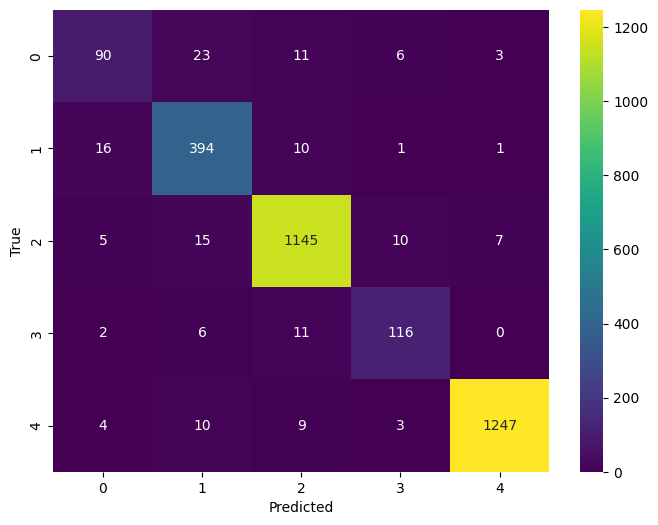

In [21]:
print('-------- Evaluando MLP --------')
evaluate_model(MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000), X_train, y_train, X_test, y_test)

## Prueba uno RedNeuronal

In [6]:
# SEPARAMOS LOS DATOS PREDICTORES Y OBJETIVO
X = df_train.drop('Target', axis=1)
y = df_train['Target']

# Submuestreo
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X, y)

# Separamos datos de entrenamiento (50%), validación (25%) y prueba (25%)
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.34, random_state=42)


X_train.shape, X_val.shape, X_test.shape


((1585, 187), (818, 187), (802, 187))

In [9]:
# submuestreo, validación cruzada y selección de características
def evaluate_model(model, X_train, y_train, X_test, y_test, param_values):
    # Definir la validación cruzada externa
    outer_kf = KFold(n_splits=5, shuffle=True, random_state=0)
    fold_scores = []

    # # Si X es un DataFrame
    # X_train, X_test = X.iloc[X_train.index], X.iloc[X_test.index]
    # y_train, y_test = y.iloc[y_train.index], y.iloc[y_test.index]

    f1_scorer = make_scorer(f1_score, average='macro')
    
    # Crear el pipeline con selección de características y clasificación
    pipeline = ImbPipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    # Configurar la búsqueda de hiperparámetros en la validación cruzada interna
    grid_search = GridSearchCV(pipeline, param_values, cv=outer_kf, scoring=f1_scorer, n_jobs=-1)

    # Ajustar la búsqueda de hiperparámetros
    grid_search.fit(X_train, y_train)
    
    # Obtener el mejor pipeline con los hiperparámetros óptimos
    best_pipeline = grid_search.best_estimator_

    # Evaluar el mejor pipeline en el conjunto de prueba interno
    y_pred = best_pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    fold_scores.append(f1)

    # Imprimir resultados
    print(f'F1 Score para datos de validación: {f1:.4f}')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return fold_scores, best_pipeline



-------- Evaluando RF --------
F1 Score para datos de validación: 0.8655
              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       142
         1.0       0.87      0.80      0.83       171
         2.0       0.89      0.90      0.90       175
         3.0       0.90      0.89      0.90       173
         4.0       0.98      0.94      0.96       157

    accuracy                           0.87       818
   macro avg       0.87      0.87      0.87       818
weighted avg       0.87      0.87      0.87       818



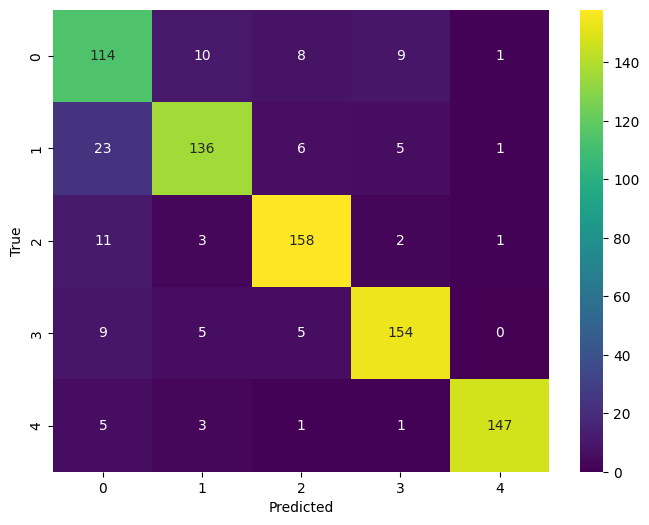

In [10]:
# Enviamos los datos de entrenamiento y validación
print('-------- Evaluando RF --------')
scores, model = evaluate_model(RandomForestClassifier(), X_train, y_train, X_val, y_val, param_values={'classifier__n_estimators': [10, 100, 1000], 
                                                                                                 'classifier__max_depth': [10, 100, 1000]})

In [12]:
# Evaluando el rendimiento del modelo final
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78       190
         1.0       0.87      0.84      0.85       154
         2.0       0.85      0.88      0.87       147
         3.0       0.87      0.87      0.87       157
         4.0       0.96      0.93      0.94       154

    accuracy                           0.86       802
   macro avg       0.86      0.86      0.86       802
weighted avg       0.86      0.86      0.86       802

